In [1]:
import cv2
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
y_test.shape

(10000,)

In [4]:
X_train = X_train.reshape(60000,28,28,1)
X_train = X_train.astype('float32')/255
X_test = X_test.reshape(10000,28,28,1)
X_test = X_test.astype('float32')/255

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[5].shape

(10,)

In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [7]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 145s 76ms/step - loss: 0.3241 - accuracy: 0.8966 - val_loss: 0.0561 - val_accuracy: 0.9820
Epoch 2/5
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.0316 - val_accuracy: 0.9902
Epoch 3/5
1875/1875 [==============================] - 137s 73ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0332 - val_accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0241 - accuracy: 0.9931 - val_loss: 0.0420 - val_accuracy: 0.9877
Epoch 5/5
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0305 - val_accuracy: 0.9918


In [12]:
model.save("digit/digit.h5")

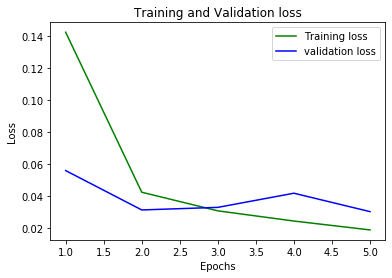

In [10]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

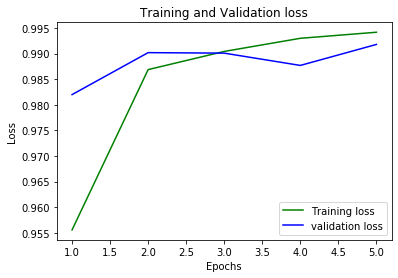

In [11]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()